In [138]:
import pandas as pd
import numpy as np

## Load csv File

In [208]:
# Specify the path to your CSV file
csv_file_path = '../output/GOPRO_OCR.csv'  # replace with your actual path

# Load the CSV data into a DataFrame
df = pd.read_csv(csv_file_path)

# Print the DataFrame
print(df.head())

                                            Filename     Text
0  F:/Dropbox/Projects/011 - UofC Leak/Test/June ...  +3729,8
1  F:/Dropbox/Projects/011 - UofC Leak/Test/June ...  +127,82
2  F:/Dropbox/Projects/011 - UofC Leak/Test/June ...  +138.81
3  F:/Dropbox/Projects/011 - UofC Leak/Test/June ...  +3751.9
4  F:/Dropbox/Projects/011 - UofC Leak/Test/June ...  +176,34


In [209]:
from datetime import timedelta

def add_time_column(df, start_time='00:00:00', start_row=0):
    # Convert the start time to a datetime object
    start_time = pd.to_datetime(start_time)

    # Calculate the number of rows to skip and the total number of rows
    skipped_rows = start_row
    total_rows = df.shape[0]

    # Create a date range with 5 second intervals, skipping the required number of rows
    time_range = pd.date_range(start=start_time, periods=total_rows-skipped_rows, freq='5S')

    # Create a new column with the time range, filling the skipped rows with NaT
    df['Time'] = pd.Series([pd.NaT]*skipped_rows + time_range.tolist())

    return df

df = add_time_column(df)
df

,Filename,Text,Time
0,F:/Dropbox/Projects/011 - UofC Leak/Test/June ...,"+3729,8",2023-06-05 00:00:00
1,F:/Dropbox/Projects/011 - UofC Leak/Test/June ...,"+127,82",2023-06-05 00:00:05
2,F:/Dropbox/Projects/011 - UofC Leak/Test/June ...,+138.81,2023-06-05 00:00:10
3,F:/Dropbox/Projects/011 - UofC Leak/Test/June ...,+3751.9,2023-06-05 00:00:15
4,F:/Dropbox/Projects/011 - UofC Leak/Test/June ...,"+176,34",2023-06-05 00:00:20
...,...,...,...
5320,F:/Dropbox/Projects/011 - UofC Leak/Test/June ...,+147.89,2023-06-05 07:23:20
5321,F:/Dropbox/Projects/011 - UofC Leak/Test/June ...,"+4693,3",2023-06-05 07:23:25
5322,F:/Dropbox/Projects/011 - UofC Leak/Test/June ...,+46863,2023-06-05 07:23:30
5323,F:/Dropbox/Projects/011 - UofC Leak/Test/June ...,+151.14,2023-06-05 07:23:35


## Conversion: No blanket conversion

In [170]:
#Process Data

# Define the function to apply to each element in column 2
def process_element(element):    # Ensure element is a string
    if not isinstance(element, str):
        element = str(element)
    # Remove '+' and '#'
    element = element.replace('+l', '+4')
    element = element.replace('+', '').replace('#', '')
    element = element.replace(',', '.')
    element = element.replace('..', '.')
    element = element.replace('I', '1')
    element = element.replace('h', '0').replace('H','0')
    
    element = element.replace('L100.2', '')
    
    # Check if element is empty after removing characters
    if element == '':
        return element
    
    if float(element) > 100000 and element[-3:-1] == '33':
        # Replace '33*' with '.3*'
        element = element[:-3] + '.' + element[-2:]
    
    # Convert the string to a float
    number = float(element)
    
    # Divide the number by 100 if it's between 10,000 and 25,000
    if 10000 <= number <= 25000:
        number /= 100
    
    # Divide the number by 10 if it's between 35,000 and 55,000
    elif 35000 <= number <= 55000:
        number /= 10
        
    # Return the processed number as a string
    return float(number)

# Apply the function to each element in column 2
df['Text_Processed'] = df['Text'].apply(process_element)

# Print the DataFrame
print(df.head())

ValueError: could not convert string to float: '15S.1'

## Conversion: Delete non-float elements

In [171]:
# Initialize the counter
invalid_elements_count = 0

# Define the function to apply to each element in column 2
def process_element(element):
    global invalid_elements_count
    # Ensure element is a string
    if not isinstance(element, str):
        element = str(element)

    # Remove '+' and '#'
    element = element.replace('+l', '+4')
    element = element.replace('+', '').replace('#', '')
    element = element.replace(',', '.')
    element = element.replace('..', '.')
    element = element.replace('I', '1')
    element = element.replace('h', '0').replace('H','0')
    
    element = element.replace('L100.2', '')
    
    # Check if element is empty after removing characters
    if element == '':
        return np.nan

    try:
        # Check if the number is larger than 100000 and ends with '33'
        if float(element) > 100000 and element[-3:-1] == '33':
            # Replace '33*' with '.3*'
            element = element[:-3] + '.' + element[-2:]
        
        # Convert the string to a float
        number = float(element)
        
        # Divide the number by 100 if it's between 10,000 and 25,000
        if 10000 <= number <= 25000:
            number /= 100
        
        # Divide the number by 10 if it's between 35,000 and 55,000
        elif 35000 <= number <= 55000:
            number /= 10
            
        # Return the processed number
        return number

    except ValueError:
        # Increment the counter for invalid elements
        invalid_elements_count += 1
        return np.nan

# Apply the function to each element in column 2
df['Text_Processed'] = df['Text'].apply(process_element)

# Drop rows where 'Text_Processed' is NaN
df = df.dropna(subset=['Text_Processed'])

# Print the number of invalid elements
print(f"Number of invalid elements: {invalid_elements_count}")

# Print the DataFrame
print(df.head())

Number of invalid elements: 80
                                            Filename     Text  Text_Processed
0  F:/Dropbox/Projects/011 - UofC Leak/Test/June ...  +3729,8         3729.80
1  F:/Dropbox/Projects/011 - UofC Leak/Test/June ...  +127,82          127.82
2  F:/Dropbox/Projects/011 - UofC Leak/Test/June ...  +138.81          138.81
3  F:/Dropbox/Projects/011 - UofC Leak/Test/June ...  +3751.9         3751.90
4  F:/Dropbox/Projects/011 - UofC Leak/Test/June ...  +176,34          176.34


## Adding a time column (edit start_row)

In [172]:
from datetime import timedelta

def add_time_column(df, start_time='00:00:00', start_row=0):
    # Convert the start time to a datetime object
    start_time = pd.to_datetime(start_time)

    # Calculate the number of rows to skip and the total number of rows
    skipped_rows = start_row
    total_rows = df.shape[0]

    # Create a date range with 5 second intervals, skipping the required number of rows
    time_range = pd.date_range(start=start_time, periods=total_rows-skipped_rows, freq='5S')

    # Create a new column with the time range, filling the skipped rows with NaT
    df['Time'] = pd.Series([pd.NaT]*skipped_rows + time_range.tolist())

    return df

df = add_time_column(df)
df

,Filename,Text,Text_Processed,Time
0,F:/Dropbox/Projects/011 - UofC Leak/Test/June ...,"+3729,8",3729.80,2023-06-05 00:00:00
1,F:/Dropbox/Projects/011 - UofC Leak/Test/June ...,"+127,82",127.82,2023-06-05 00:00:05
2,F:/Dropbox/Projects/011 - UofC Leak/Test/June ...,+138.81,138.81,2023-06-05 00:00:10
3,F:/Dropbox/Projects/011 - UofC Leak/Test/June ...,+3751.9,3751.90,2023-06-05 00:00:15
4,F:/Dropbox/Projects/011 - UofC Leak/Test/June ...,"+176,34",176.34,2023-06-05 00:00:20
...,...,...,...,...
5320,F:/Dropbox/Projects/011 - UofC Leak/Test/June ...,+147.89,147.89,NaT
5321,F:/Dropbox/Projects/011 - UofC Leak/Test/June ...,"+4693,3",4693.30,NaT
5322,F:/Dropbox/Projects/011 - UofC Leak/Test/June ...,+46863,4686.30,NaT
5323,F:/Dropbox/Projects/011 - UofC Leak/Test/June ...,+151.14,151.14,NaT


## Plot Data

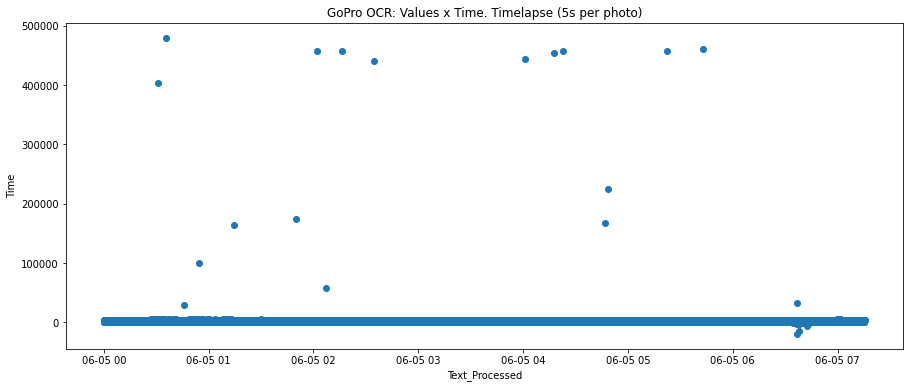

In [173]:
# Set the figure size and aspect ratio
plt.figure(figsize=(15, 6))  # Adjust the values as per your preference


# Create a scatter plot
plt.scatter(df['Time'], df['Text_Processed'])

# Set labels and title
plt.xlabel('Text_Processed')
plt.ylabel('Time')
plt.title('GoPro OCR: Values x Time. Timelapse (5s per photo)')

# Show the plot
plt.show()

In [203]:
from scipy.stats import zscore

# Compute Z-scores
df['Z_Score'] = zscore(df['Text_Processed'])

# Define a threshold
threshold = 1

# Find outliers
outliers = df[np.abs(df['Z_Score']) > threshold]

print("Outliers:")
print(len(outliers))


Outliers:
20


In [204]:
import numpy as np

# Replace outliers with NaN
df['Text_Processed_No_Outliers'] = np.where(np.abs(df['Z_Score']) > threshold, np.nan, df['Text_Processed'])

print(df.head())

                                            Filename     Text  Text_Processed  \
0  F:/Dropbox/Projects/011 - UofC Leak/Test/June ...  +3729,8         3729.80   
1  F:/Dropbox/Projects/011 - UofC Leak/Test/June ...  +127,82          127.82   
2  F:/Dropbox/Projects/011 - UofC Leak/Test/June ...  +138.81          138.81   
3  F:/Dropbox/Projects/011 - UofC Leak/Test/June ...  +3751.9         3751.90   
4  F:/Dropbox/Projects/011 - UofC Leak/Test/June ...  +176,34          176.34   

                 Time   Z_Score  Text_Processed_No_Outliers  
0 2023-06-05 00:00:00  0.013016                     3729.80  
1 2023-06-05 00:00:05 -0.154751                      127.82  
2 2023-06-05 00:00:10 -0.154239                      138.81  
3 2023-06-05 00:00:15  0.014045                     3751.90  
4 2023-06-05 00:00:20 -0.152491                      176.34  


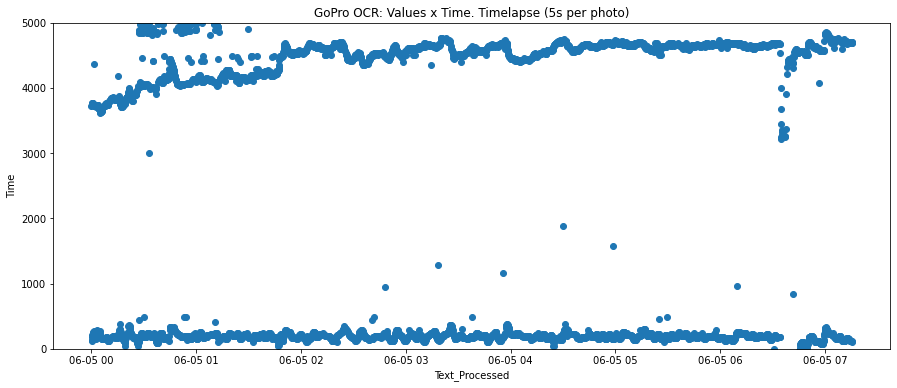

In [205]:
# Set the figure size and aspect ratio
plt.figure(figsize=(15, 6))  # Adjust the values as per your preference


# Create a scatter plot
plt.scatter(df['Time'], df['Text_Processed_No_Outliers'])

# Set labels and title
plt.xlabel('Text_Processed')
plt.ylabel('Time')
plt.title('GoPro OCR: Values x Time. Timelapse (5s per photo)')
plt.ylim(0, 5000)

# Show the plot
plt.show()

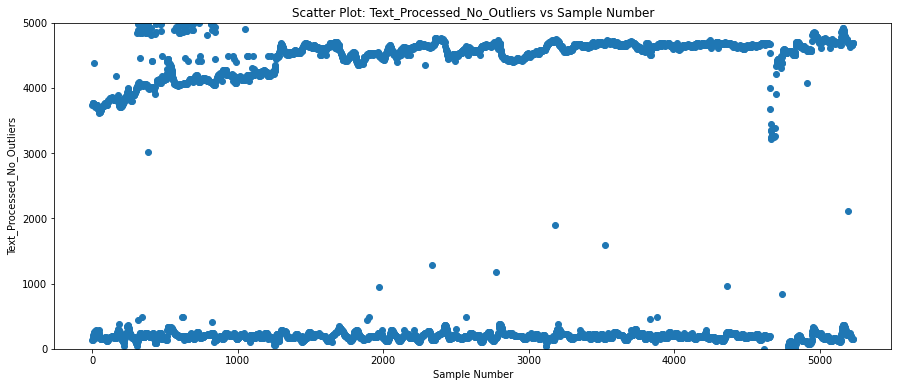

In [206]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set the figure size and aspect ratio
plt.figure(figsize=(15, 6))  # Adjust the values as per your preference

# Create a scatter plot
sample_number = np.arange(1, len(df)+1)
#plt.scatter(df['Text_Processed_No_Outliers'], sample_number)
plt.scatter(sample_number, df['Text_Processed_No_Outliers'])

# Set labels and title
plt.xlabel('Sample Number')
plt.ylabel('Text_Processed_No_Outliers')
plt.title('Scatter Plot: Text_Processed_No_Outliers vs Sample Number')
plt.ylim(0, 5000)  # Adjust the y-axis limits as per your preference

# Show the plot
plt.show()


In [210]:
# Generate the output file name by appending "processed" to the input file name
output_file_path = csv_file_path.replace('.csv', '_processed.csv')

# Export the DataFrame to a CSV file
df.to_csv(output_file_path, index=False)

print(f"Processed data saved to {output_file_path}")

Processed data saved to ../output/GOPRO_OCR_processed__2.csv


## move somewhere else

In [222]:
# Load the data
df = pd.read_excel('../output/GOPRO_OCR_processed_final.xlsx')

df.head()



,Filename,Time,OCR_Value
0,F:/Dropbox/Projects/011 - UofC Leak/Test/June ...,07:44:25,3729.80
1,F:/Dropbox/Projects/011 - UofC Leak/Test/June ...,07:44:30,127.82
2,F:/Dropbox/Projects/011 - UofC Leak/Test/June ...,07:44:35,138.81
3,F:/Dropbox/Projects/011 - UofC Leak/Test/June ...,07:44:40,3751.90
4,F:/Dropbox/Projects/011 - UofC Leak/Test/June ...,07:44:45,176.34


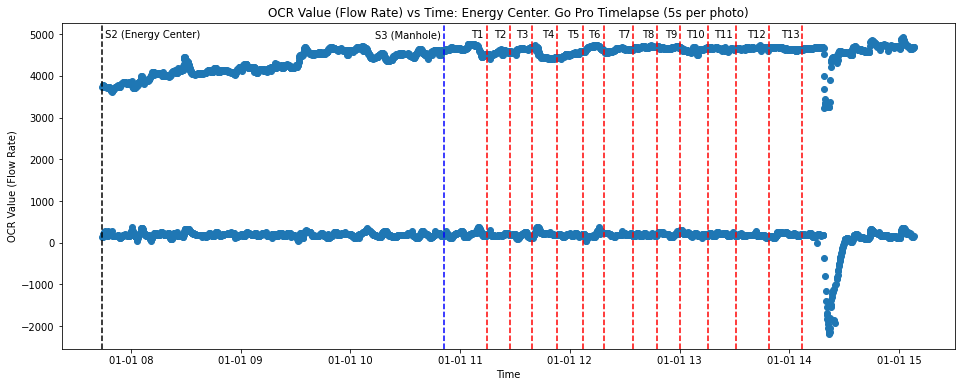

In [254]:
# Ensure 'Time' column is recognized as a datetime object
#df['Time'] = pd.to_datetime(df['Time'])

# Ensure 'Time' column is recognized as a datetime object
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')


# Plot the data
plt.figure(figsize=(16,6))
plt.scatter(df['Time'], df['OCR_Value'])

# Specify the title and labels
plt.title('OCR Value (Flow Rate) vs Time: Energy Center. Go Pro Timelapse (5s per photo)')
plt.xlabel('Time')
plt.ylabel('OCR Value (Flow Rate)')

# Add a vertical line at a specific time (e.g., '7:50:00 AM')
marker_time = pd.to_datetime('07:44:25 AM', format='%I:%M:%S %p')
plt.axvline(x=marker_time, color='k', linestyle='--')
# Add text at the marker's position
plt.text(marker_time, df['OCR_Value'].max(), ' S2 (Energy Center) ', horizontalalignment='left')


marker_time = pd.to_datetime('10:51:08 AM', format='%I:%M:%S %p')
plt.axvline(x=marker_time, color='b', linestyle='--')
# Add text at the marker's position
plt.text(marker_time, df['OCR_Value'].max(), 'S3 (Manhole) ', horizontalalignment='right')


marker_time = pd.to_datetime('11:14:29 AM', format='%I:%M:%S %p')
plt.axvline(x=marker_time, color='r', linestyle='--')
# Add text at the marker's position
plt.text(marker_time, df['OCR_Value'].max(), 'T1 ', horizontalalignment='right')

marker_time = pd.to_datetime('11:27:14 AM', format='%I:%M:%S %p')
plt.axvline(x=marker_time, color='r', linestyle='--')
# Add text at the marker's position
plt.text(marker_time, df['OCR_Value'].max(), 'T2 ', horizontalalignment='right')

marker_time = pd.to_datetime('11:39:04 AM', format='%I:%M:%S %p')
plt.axvline(x=marker_time, color='r', linestyle='--')
# Add text at the marker's position
plt.text(marker_time, df['OCR_Value'].max(), 'T3 ', horizontalalignment='right')

marker_time = pd.to_datetime('11:53:08 AM', format='%I:%M:%S %p')
plt.axvline(x=marker_time, color='r', linestyle='--')
# Add text at the marker's position
plt.text(marker_time, df['OCR_Value'].max(), 'T4 ', horizontalalignment='right')

marker_time = pd.to_datetime('12:07:12 PM', format='%I:%M:%S %p')
plt.axvline(x=marker_time, color='r', linestyle='--')
# Add text at the marker's position
plt.text(marker_time, df['OCR_Value'].max(), 'T5 ', horizontalalignment='right')

marker_time = pd.to_datetime('12:18:25 PM', format='%I:%M:%S %p')
plt.axvline(x=marker_time, color='r', linestyle='--')
# Add text at the marker's position
plt.text(marker_time, df['OCR_Value'].max(), 'T6 ', horizontalalignment='right')

marker_time = pd.to_datetime('12:34:43 PM', format='%I:%M:%S %p')
plt.axvline(x=marker_time, color='r', linestyle='--')
# Add text at the marker's position
plt.text(marker_time, df['OCR_Value'].max(), 'T7 ', horizontalalignment='right')

marker_time = pd.to_datetime('12:47:55 PM', format='%I:%M:%S %p')
plt.axvline(x=marker_time, color='r', linestyle='--')
# Add text at the marker's position
plt.text(marker_time, df['OCR_Value'].max(), 'T8 ', horizontalalignment='right')

marker_time = pd.to_datetime('01:00:25 PM', format='%I:%M:%S %p')
plt.axvline(x=marker_time, color='r', linestyle='--')
# Add text at the marker's position
plt.text(marker_time, df['OCR_Value'].max(), 'T9 ', horizontalalignment='right')

marker_time = pd.to_datetime('01:15:28 PM', format='%I:%M:%S %p')
plt.axvline(x=marker_time, color='r', linestyle='--')
# Add text at the marker's position
plt.text(marker_time, df['OCR_Value'].max(), 'T10 ', horizontalalignment='right')

marker_time = pd.to_datetime('01:30:58 PM', format='%I:%M:%S %p')
plt.axvline(x=marker_time, color='r', linestyle='--')
# Add text at the marker's position
plt.text(marker_time, df['OCR_Value'].max(), 'T11 ', horizontalalignment='right')

marker_time = pd.to_datetime('01:48:51 PM', format='%I:%M:%S %p')
plt.axvline(x=marker_time, color='r', linestyle='--')
# Add text at the marker's position
plt.text(marker_time, df['OCR_Value'].max(), 'T12 ', horizontalalignment='right')

marker_time = pd.to_datetime('02:07:08 PM', format='%I:%M:%S %p')
plt.axvline(x=marker_time, color='r', linestyle='--')
# Add text at the marker's position
plt.text(marker_time, df['OCR_Value'].max(), 'T13 ', horizontalalignment='right')

# Save the plot to a file
plt.savefig('Jun5_GoPro_Markers.png', dpi=300)

# Display the plot
plt.show()


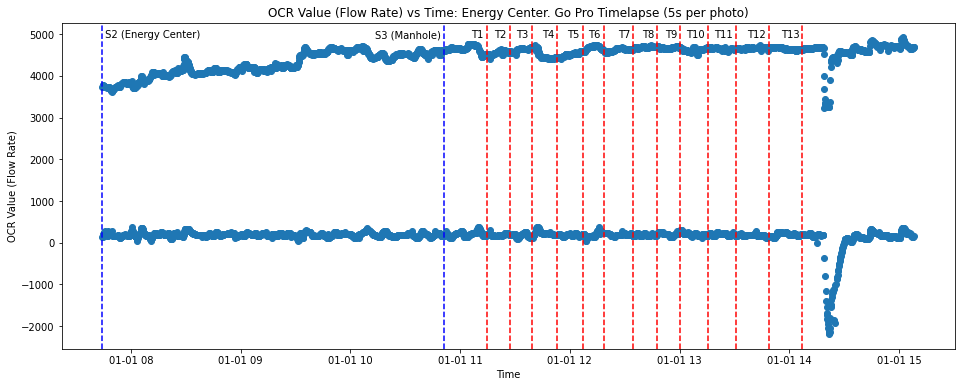

In [252]:
# Ensure 'Time' column is recognized as a datetime object
#df['Time'] = pd.to_datetime(df['Time'])

# Ensure 'Time' column is recognized as a datetime object
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')


# Plot the data
plt.figure(figsize=(16,6))
plt.scatter(df['Time'], df['OCR_Value'])

# Specify the title and labels
plt.title('OCR Value (Flow Rate) vs Time: Energy Center. Go Pro Timelapse (5s per photo)')
plt.xlabel('Time')
plt.ylabel('OCR Value (Flow Rate)')

# Add a vertical line at a specific time (e.g., '7:50:00 AM')
marker_time = pd.to_datetime('07:44:25 AM', format='%I:%M:%S %p')
plt.axvline(x=marker_time, color='b', linestyle='--')
# Add text at the marker's position
plt.text(marker_time, df['OCR_Value'].max(), ' S2 (Energy Center) ', horizontalalignment='left')


marker_time = pd.to_datetime('10:51:08 AM', format='%I:%M:%S %p')
plt.axvline(x=marker_time, color='b', linestyle='--')
# Add text at the marker's position
plt.text(marker_time, df['OCR_Value'].max(), 'S3 (Manhole) ', horizontalalignment='right')


marker_time = pd.to_datetime('11:14:29 AM', format='%I:%M:%S %p')
plt.axvline(x=marker_time, color='r', linestyle='--')
# Add text at the marker's position
plt.text(marker_time, df['OCR_Value'].max(), 'T1 ', horizontalalignment='right')

marker_time = pd.to_datetime('11:27:14 AM', format='%I:%M:%S %p')
plt.axvline(x=marker_time, color='r', linestyle='--')
# Add text at the marker's position
plt.text(marker_time, df['OCR_Value'].max(), 'T2 ', horizontalalignment='right')

marker_time = pd.to_datetime('11:39:04 AM', format='%I:%M:%S %p')
plt.axvline(x=marker_time, color='r', linestyle='--')
# Add text at the marker's position
plt.text(marker_time, df['OCR_Value'].max(), 'T3 ', horizontalalignment='right')

marker_time = pd.to_datetime('11:53:08 AM', format='%I:%M:%S %p')
plt.axvline(x=marker_time, color='r', linestyle='--')
# Add text at the marker's position
plt.text(marker_time, df['OCR_Value'].max(), 'T4 ', horizontalalignment='right')

marker_time = pd.to_datetime('12:07:12 PM', format='%I:%M:%S %p')
plt.axvline(x=marker_time, color='r', linestyle='--')
# Add text at the marker's position
plt.text(marker_time, df['OCR_Value'].max(), 'T5 ', horizontalalignment='right')

marker_time = pd.to_datetime('12:18:25 PM', format='%I:%M:%S %p')
plt.axvline(x=marker_time, color='r', linestyle='--')
# Add text at the marker's position
plt.text(marker_time, df['OCR_Value'].max(), 'T6 ', horizontalalignment='right')

marker_time = pd.to_datetime('12:34:43 PM', format='%I:%M:%S %p')
plt.axvline(x=marker_time, color='r', linestyle='--')
# Add text at the marker's position
plt.text(marker_time, df['OCR_Value'].max(), 'T7 ', horizontalalignment='right')

marker_time = pd.to_datetime('12:47:55 PM', format='%I:%M:%S %p')
plt.axvline(x=marker_time, color='r', linestyle='--')
# Add text at the marker's position
plt.text(marker_time, df['OCR_Value'].max(), 'T8 ', horizontalalignment='right')

marker_time = pd.to_datetime('01:00:25 PM', format='%I:%M:%S %p')
plt.axvline(x=marker_time, color='r', linestyle='--')
# Add text at the marker's position
plt.text(marker_time, df['OCR_Value'].max(), 'T9 ', horizontalalignment='right')

marker_time = pd.to_datetime('01:15:28 PM', format='%I:%M:%S %p')
plt.axvline(x=marker_time, color='r', linestyle='--')
# Add text at the marker's position
plt.text(marker_time, df['OCR_Value'].max(), 'T10 ', horizontalalignment='right')

marker_time = pd.to_datetime('01:30:58 PM', format='%I:%M:%S %p')
plt.axvline(x=marker_time, color='r', linestyle='--')
# Add text at the marker's position
plt.text(marker_time, df['OCR_Value'].max(), 'T11 ', horizontalalignment='right')

marker_time = pd.to_datetime('01:48:51 PM', format='%I:%M:%S %p')
plt.axvline(x=marker_time, color='r', linestyle='--')
# Add text at the marker's position
plt.text(marker_time, df['OCR_Value'].max(), 'T12 ', horizontalalignment='right')

marker_time = pd.to_datetime('02:07:08 PM', format='%I:%M:%S %p')
plt.axvline(x=marker_time, color='r', linestyle='--')
# Add text at the marker's position
plt.text(marker_time, df['OCR_Value'].max(), 'T13 ', horizontalalignment='right')

# Save the plot to a file
plt.savefig('Jun5_GoPro_No_Markers.png', dpi=300)

# Display the plot
plt.show()
